In [1]:
points = [(0, 0), (1, 0), (2, 1), (1, 2), (0, 2)]
points = [(1, 2), (4, 3), (5, 7), (3, 10), (0, 7)]
# points = [(1.0, 0.0),(0.5000000000000001, 0.8660254037844386),(-0.4999999999999998, 0.8660254037844387),(-1.0, 1.2246467991473532e-16), (-0.5000000000000004, -0.8660254037844385), (0.49999999999999933, -0.866025403784439)]

[[None, None, 1, 2, 1], [None, None, None, 2, 2], [None, None, None, None, 3], [None, None, None, None, None], [None, None, None, None, None]]
Minimum triangulation cost: 41.54630326094686
[[(1, 2), (4, 3), (0, 7)], [(4, 3), (5, 7), (0, 7)], [(5, 7), (3, 10), (0, 7)]]


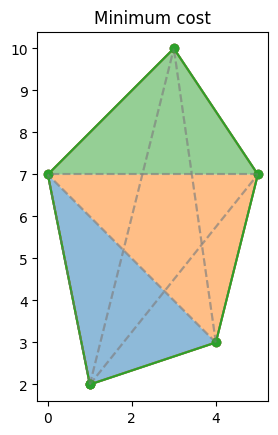

In [2]:
import math
import matplotlib.pyplot as plt
 
# ไว้หาความยาวระหว่างจุด
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
 
# ไว้หาความยาวรอบรูปของสามเหลี่ยมจ้าว
def triangle_perimeter(p1, p2, p3):
    return dist(p1, p2) + dist(p2, p3) + dist(p3, p1)
 
# Dynamic program
def min_triangulation_cost(points):
    n = len(points)
    dp = [[0] * n for _ in range(n)]
    triangulation = [[None] * n for _ in range(n)]
    for gap in range(2, n):
        # print('gap'+str(gap))
        for i in range(n - gap):
            j = i + gap
            dp[i][j] = float('inf')
            for k in range(i + 1, j):
                cost = dp[i][k] + dp[k][j] + triangle_perimeter(points[i], points[k], points[j])
                # print(i,j,k)
                if cost < dp[i][j]:
                    dp[i][j] = cost
                    triangulation[i][j] = k
    print(triangulation)
    return dp[0][n-1], triangulation
 
# Function to extract the diagonals from the triangulation table
def get_diagonals(triangulation, i, j, diagonals):
    if triangulation[i][j] is None:
        return 
    k = triangulation[i][j]
    diagonals.append((i, k))
    diagonals.append((k, j))
    get_diagonals(triangulation, i, k, diagonals)
    get_diagonals(triangulation, k, j, diagonals)
 
# Compute the minimum triangulation cost and get the triangulation choices
cost, triangulation = min_triangulation_cost(points)
print(f"Minimum triangulation cost: {cost}")
 
# Get the list of diagonals for the minimum cost triangulation
diagonals = []
get_diagonals(triangulation, 0, len(points) - 1, diagonals)

triangles = []

for i in range(0, len(diagonals), 2):
    sub_triangle=[]
    sub_triangle.append(diagonals[i][0])
    sub_triangle.append(diagonals[i+1][0])
    sub_triangle.append((diagonals[i+1][1]))
    triangles.append(sub_triangle)
    sub_triangle=[]


for i in range(len(triangles)):
    for j in range(len(triangles[i])):
        # print(str(triangles[i][j])+(" to be "+str(points[triangles[i][j]])))
        triangles[i][j] = points[triangles[i][j]]
print(triangles)


def plot_triangle(one_triangle):
    x_values = [one_triangle[0][0], one_triangle[1][0], one_triangle[2][0]]
    # print(x_values)
    y_values = [one_triangle[0][1], one_triangle[1][1], one_triangle[2][1]]
    # print(y_values)
    plt.fill(x_values, y_values, alpha=0.5)

    x_vals, y_vals = zip(*points)

    # Plot the polygon
    plt.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'o-', label='Polygon')
    # Draw all possible diagonals (light gray)
    for i in range(len(points)):
        for j in range(i+2, len(points)):
            if j != i - 1 and j != (i + 1) % len(points):
                plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'gray', linestyle='--', alpha=0.3)


for i in triangles:
    plot_triangle(i)

plt.title('Minimum cost')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


[[0, 0, 13.688507523218888, 33.2792814362163, 50.867152888163695], [0, 0, 0, 14.799724712947125, 31.770287461424264], [0, 0, 0, 0, 12.848191962583273], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
Maximum triangulation cost: 50.8672
[[(1, 2), (3, 10), (0, 7)], [(1, 2), (4, 3), (3, 10)], [(4, 3), (5, 7), (3, 10)]]


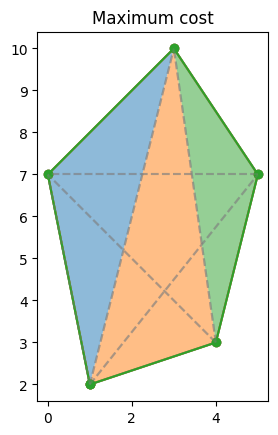

In [3]:
import math
import matplotlib.pyplot as plt
 
# Function to calculate the distance between two points
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
 
# Function to calculate the perimeter of a triangle formed by three points
def triangle_perimeter(p1, p2, p3):
    return dist(p1, p2) + dist(p2, p3) + dist(p3, p1)
 
# Dynamic programming function to calculate the maximum triangulation cost and store the solution path
def max_triangulation_cost(points):
    n = len(points)
    dp = [[0] * n for _ in range(n)]
    triangulation = [[None] * n for _ in range(n)]
 
    for gap in range(2, n):
        for i in range(n - gap):
            j = i + gap
            dp[i][j] = -float('inf')
            for k in range(i + 1, j):
                cost = dp[i][k] + dp[k][j] + triangle_perimeter(points[i], points[k], points[j])
                if cost > dp[i][j]:
                    dp[i][j] = cost
                    triangulation[i][j] = k
    print(dp)
    return dp[0][n-1], triangulation
 
# Function to extract the diagonals from the triangulation table
def get_diagonals(triangulation, i, j, diagonals):
    if triangulation[i][j] is None:
        return
    k = triangulation[i][j]
    diagonals.append((i, k))
    diagonals.append((k, j))
    get_diagonals(triangulation, i, k, diagonals)
    get_diagonals(triangulation, k, j, diagonals)
 
# Visualization function to highlight the maximum triangulation paths
def visualize_triangulation(points, diagonals):
    x_vals, y_vals = zip(*points)
    # Plot the polygon
    plt.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'o-', label='Polygon')
 
    # Draw all possible diagonals (light gray)
    for i in range(len(points)):
        for j in range(i+2, len(points)):
            if j != i - 1 and j != (i + 1) % len(points):
                plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'gray', linestyle='--', alpha=0.3)
 
    # Highlight the maximum triangulation paths (blue)
    for (i, j) in diagonals:
        plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'g-', label='Max Path' if i == diagonals[0][0] and j == diagonals[0][1] else "")
 
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()
 
# Example input points
 
# Compute the maximum triangulation cost and get the triangulation choices
cost, triangulation = max_triangulation_cost(points)
print(f"Maximum triangulation cost: {cost:.4f}")
 
# Get the list of diagonals for the maximum cost triangulation
diagonals = []
get_diagonals(triangulation, 0, len(points) - 1, diagonals)
 
# # Visualize the polygon and highlight the maximum triangulation
# visualize_triangulation(points, diagonals)

triangles = []

for i in range(0, len(diagonals), 2):
    sub_triangle=[]
    sub_triangle.append(diagonals[i][0])
    sub_triangle.append(diagonals[i+1][0])
    sub_triangle.append((diagonals[i+1][1]))
    triangles.append(sub_triangle)
    sub_triangle=[]


for i in range(len(triangles)):
    for j in range(len(triangles[i])):
        # print(str(triangles[i][j])+(" to be "+str(points[triangles[i][j]])))
        triangles[i][j] = points[triangles[i][j]]
print(triangles)

def plot_triangle(one_triangle):
    x_values = [one_triangle[0][0], one_triangle[1][0], one_triangle[2][0]]
    # print(x_values)
    y_values = [one_triangle[0][1], one_triangle[1][1], one_triangle[2][1]]
    # print(y_values)
    plt.fill(x_values, y_values, alpha=0.5)

    x_vals, y_vals = zip(*points)

    # Plot the polygon
    plt.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'o-', label='Polygon')
    # Draw all possible diagonals (light gray)
    for i in range(len(points)):
        for j in range(i+2, len(points)):
            if j != i - 1 and j != (i + 1) % len(points):
                plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'gray', linestyle='--', alpha=0.3)


for i in triangles:
    plot_triangle(i)

plt.title('Maximum cost')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


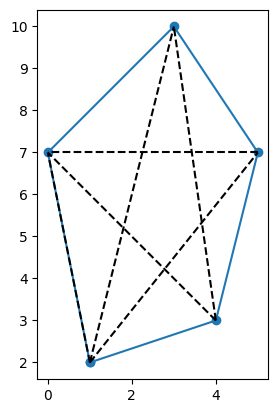

In [4]:
import math
import matplotlib.pyplot as plt
 
# Function to calculate the distance between two points
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
 
# Function to calculate the perimeter of a triangle formed by three points
def triangle_perimeter(p1, p2, p3):
    return dist(p1, p2) + dist(p2, p3) + dist(p3, p1)
 
# Dynamic programming function to calculate the minimum triangulation cost
def min_triangulation_cost(points):
    n = len(points)
    dp = [[0] * n for _ in range(n)]
 
    for gap in range(2, n):
        for i in range(n - gap):
            j = i + gap
            dp[i][j] = float('inf')
            for k in range(i + 1, j):
                cost = dp[i][k] + dp[k][j] + triangle_perimeter(points[i], points[k], points[j])
                dp[i][j] = min(dp[i][j], cost)
 
    return dp[0][n-1]
 
# Visualization function
def visualize_triangulation(points):
    x_vals, y_vals = zip(*points)
    plt.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), 'o-')
 
    for i in range(len(points)):
        for j in range(i+2, len(points)):
            if j != i - 1 and j != (i + 1) % len(points):
                plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'k--')
 
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
 
 
# Visualize the polygon and potential triangulations
visualize_triangulation(points)

[0, 1, 2, 0]
[0, 0, 1, 0]
[0, 2, 0, 0]
[0, 1, 2, 0]
[2, 1, 0, 2]
[1, 2, 2, 1]


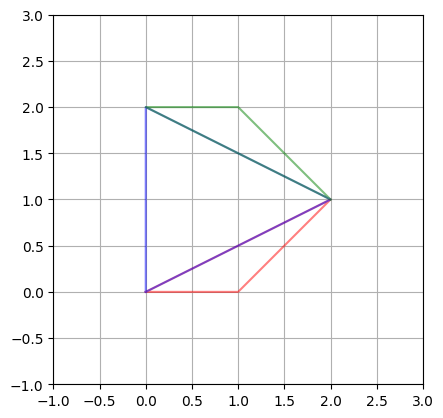

In [5]:
import matplotlib.pyplot as plt
 
# ฟังก์ชันเพื่อวาดและเติมสีสามเหลี่ยม
def plot_triangle(p1, p2, p3, color):
    x_values = [p1[0], p2[0], p3[0], p1[0]]
    print(x_values)
    y_values = [p1[1], p2[1], p3[1], p1[1]]
    print(y_values)
    plt.plot(x_values, y_values, color=color, alpha=0.5)
 
# พิกัดจุดของรูปหลายเหลี่ยม
points = [(0, 0), (1, 0), (2, 1), (1, 2), (0, 2)]
 
# เติมสีสามเหลี่ยมในรูปสามเหลี่ยมที่แตกต่างกัน
plot_triangle(points[0], points[1], points[2], 'red')
plot_triangle(points[0], points[2], points[4], 'blue')
plot_triangle(points[2], points[3], points[4], 'green')
 
# ตั้งค่าแกนและแสดงกราฟ
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid(True)
plt.show()

In [6]:
y = 7
x = [2, y, 5]
print(x)

[2, 7, 5]


In [7]:
# Input as a string
input_str = """
1 2
4 3
5 7
3 10
0 7
"""

print([tuple(map(int, line.split())) for line in input_str.strip().split('\n')])


[(1, 2), (4, 3), (5, 7), (3, 10), (0, 7)]
